## **Exercise 1**
<!-- @q -->

Following from last week, we'll use the `moons` dataset to explore the performance of the SVC classifier. The following just sets up the code.

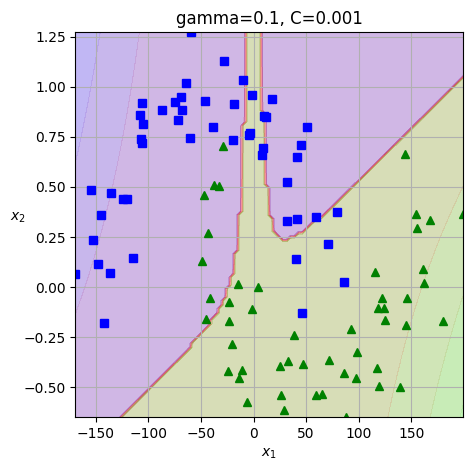

In [2]:
# @SHOW
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X[:,0] = X[:,0]*100 - 42

def get_extents(X):
    return [np.min(X[:,0]),np.max(X[:,0]),np.min(X[:,1]),np.max(X[:,1])]

def plot_dataset(X, y, axes = None):
    if axes is None:
        axes = get_extents(X)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):    
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

gamma = 0.1
C = 0.001

svm_clf = SVC(kernel="poly",gamma = gamma, C = C)
svm_clf.fit(X, y)

plt.figure(figsize=(5,5))
plot_predictions(svm_clf,get_extents(X))
plot_dataset(X, y)
plt.title(f"gamma={gamma}, C={C}")
plt.show()

### Part 1: Standard Scalar implementation


Use a standard scaler to scale the data before running the classifier. Use the dataset generated above (which has been deliberately skewed).  Fit using the same parameters as with the code above.

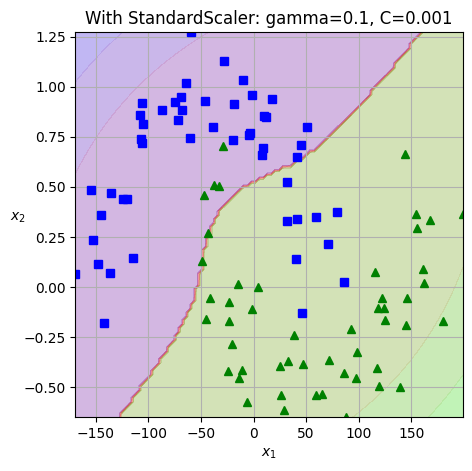

Original data range:
  X[:,0]: [-169.20, 198.94]
  X[:,1]: [-0.65, 1.27]

Scaled data range:
  X[:,0]: [-1.98, 2.11]
  X[:,1]: [-1.77, 2.04]

Mean after scaling: [ 1.11022302e-17 -1.87072580e-16]
Std after scaling: [1. 1.]


In [3]:
# Your code here
# Create a pipeline with StandardScaler and SVC
from sklearn.preprocessing import StandardScaler
svm_clf_scaled = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", gamma=gamma, C=C)
)

# Fit the pipeline (scaling + training)
svm_clf_scaled.fit(X, y)

# Plot the results
plt.figure(figsize=(5, 5))
plot_predictions(svm_clf_scaled, get_extents(X))
plot_dataset(X, y)
plt.title(f"With StandardScaler: gamma={gamma}, C={C}")
plt.show()

# Print comparison
print("Original data range:")
print(f"  X[:,0]: [{np.min(X[:,0]):.2f}, {np.max(X[:,0]):.2f}]")
print(f"  X[:,1]: [{np.min(X[:,1]):.2f}, {np.max(X[:,1]):.2f}]")

# Get scaled data for comparison
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nScaled data range:")
print(f"  X[:,0]: [{np.min(X_scaled[:,0]):.2f}, {np.max(X_scaled[:,0]):.2f}]")
print(f"  X[:,1]: [{np.min(X_scaled[:,1]):.2f}, {np.max(X_scaled[:,1]):.2f}]")
print(f"\nMean after scaling: {np.mean(X_scaled, axis=0)}")
print(f"Std after scaling: {np.std(X_scaled, axis=0)}")

What do you think?  Does scaling matter here?  Why or why not?

*Enter your answer in this cell* Yes, scaling matters significantly.Before scaling， feature X[:,0] ranges from ~-42 to ~58, while feature X[:,1] ranges from ~-0.6 to ~1.2.The first feature completely dominates. After scaling, both features have similar ranges (mean=0, std=1) and both features contribute equally, allowing the polynomial kernel to capture the actual pattern. Without scaling, the classification is poor and the decision boundary mostly ignores the vertical (X[:,1]) dimension. With scaling, the classification is much better and it properly captures the moon-shaped separation.
With C=0.001 (very low regularization) and highly imbalanced features, scaling is essential for the SVM to learn meaningful patterns from both features equally. Without it, the training only focused on one feature!

#### Part 2: Different settings for `C` and `gamma`



Run the SVC classifier (using the poly kernel) on the same dataset (with scaling) over a range of parameters. Determine which parameter combination is best, and visualize each parameter combination to get a sense of what they are doing?

In [4]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
C_values = [0.001, 0.01, 0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize tracking variables
best_C = None
best_gamma = None
best_f1 = 0
best_accuracy = 0

# TODO: Replace with your code (fill)
best_clf = None

# Store results for visualization
results = []

# Grid search over C and gamma
print("Testing parameter combinations...")
print("-" * 60)

for C in C_values:
    for gamma in gamma_values:
        # Create pipeline with StandardScaler and SVC
        svm_clf = make_pipeline(
            StandardScaler(),
            SVC(kernel="poly", gamma=gamma, C=C)
        )
        
        # Fit the model
        svm_clf.fit(X, y)
        
        # Make predictions
        y_pred = svm_clf.predict(X)
        
        # Calculate metrics
        f1 = f1_score(y, y_pred)
        accuracy = accuracy_score(y, y_pred)
        
        # Store results
        results.append({
            'C': C,
            'gamma': gamma,
            'f1': f1,
            'accuracy': accuracy,
            'clf': svm_clf
        })
        
        print(f"C={C:6.3f}, gamma={gamma:6.3f} -> F1={f1:.3f}, Accuracy={accuracy:.3f}")
        
        # Update best parameters
        if f1 > best_f1:
            best_f1 = f1
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma
            best_clf = svm_clf

print(f"\nBest parameters based on F1 score:")
print(f"Best C: {best_C}, Best gamma: {best_gamma}")
print(f"Best F1 Score: {best_f1:.3f}, Accuracy: {best_accuracy:.3f}")


Testing parameter combinations...
------------------------------------------------------------
C= 0.001, gamma= 0.001 -> F1=0.865, Accuracy=0.860
C= 0.001, gamma= 0.010 -> F1=0.865, Accuracy=0.860
C= 0.001, gamma= 0.100 -> F1=0.865, Accuracy=0.860
C= 0.001, gamma= 1.000 -> F1=0.828, Accuracy=0.850
C= 0.001, gamma=10.000 -> F1=0.916, Accuracy=0.910
C= 0.010, gamma= 0.001 -> F1=0.865, Accuracy=0.860
C= 0.010, gamma= 0.010 -> F1=0.865, Accuracy=0.860
C= 0.010, gamma= 0.100 -> F1=0.865, Accuracy=0.860
C= 0.010, gamma= 1.000 -> F1=0.863, Accuracy=0.860
C= 0.010, gamma=10.000 -> F1=0.916, Accuracy=0.910
C= 0.100, gamma= 0.001 -> F1=0.865, Accuracy=0.860
C= 0.100, gamma= 0.010 -> F1=0.865, Accuracy=0.860
C= 0.100, gamma= 0.100 -> F1=0.865, Accuracy=0.860
C= 0.100, gamma= 1.000 -> F1=0.863, Accuracy=0.860
C= 0.100, gamma=10.000 -> F1=0.906, Accuracy=0.900
C= 1.000, gamma= 0.001 -> F1=0.865, Accuracy=0.860
C= 1.000, gamma= 0.010 -> F1=0.865, Accuracy=0.860
C= 1.000, gamma= 0.100 -> F1=0.828, Ac

What is the impact of C? What is the impact of gamma? Which setting works the best? Why? What do you think would happen if you added more noise?

*Enter your answer in this cell* 
The parameter C controls the regularization strength in the SVM, representing the trade-off between achieving a smooth decision boundary and correctly classifying training points.  The parameter gamma determines the reach of influence for each training example in the polynomial kernel. 
Low C (0.001, 0.01): High regularization → smoother, simpler decision boundaries (may underfit)
High C (1, 10): Low regularization → complex, flexible boundaries (may overfit)
Low gamma (0.001, 0.01): Wide influence → smoother boundaries
High gamma (1, 10): Narrow influence → more localized, complex boundaries

Best Setting: C=0.001, gamma=10 (F1=0.916, Accuracy=91%).Essentially, high gamma provides the flexibility to fit the non-linear curves, while low C prevents that flexibility from going too far and fitting noise. The polynomial kernel with high gamma creates rich feature interactions that can represent the curved separation, and the strong regularization ensures these features focus on the true pattern rather than random variations.

If noise increased significantly (e.g., from 0.15 to 0.3-0.4), the current best setting would likely fail. The combination of C=0.001 and gamma=10 would struggle because high gamma creates very localized decision boundaries that would start wrapping around individual noisy points, even with strong regularization. Performance would degrade noticeably.high gamma's advantage (capturing complex patterns) becomes a liability (fitting noise) as noise increases, making smoother kernels more robust.

#### Part 3: RBF Kernel


Try running the classifier with an `rbf` kernel using `gamma = 0.1` and `C = 0.001`. Check your accuracy with crossfold validation and plot your results.

Part 3: RBF Kernel with Cross-Validation

Parameters: kernel='rbf', gamma=0.1, C=0.001

Cross-Validation Results (5-fold):
Accuracy scores: [0.8 1.  0.9 0.9 0.8]
Mean Accuracy: 0.880 (+/- 0.150)

F1 scores: [0.8        1.         0.88888889 0.90909091 0.8       ]
Mean F1 Score: 0.880 (+/- 0.150)

Training Set Performance:
Accuracy: 0.870
F1 Score: 0.871

Confusion Matrix:
[[43  7]
 [ 6 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



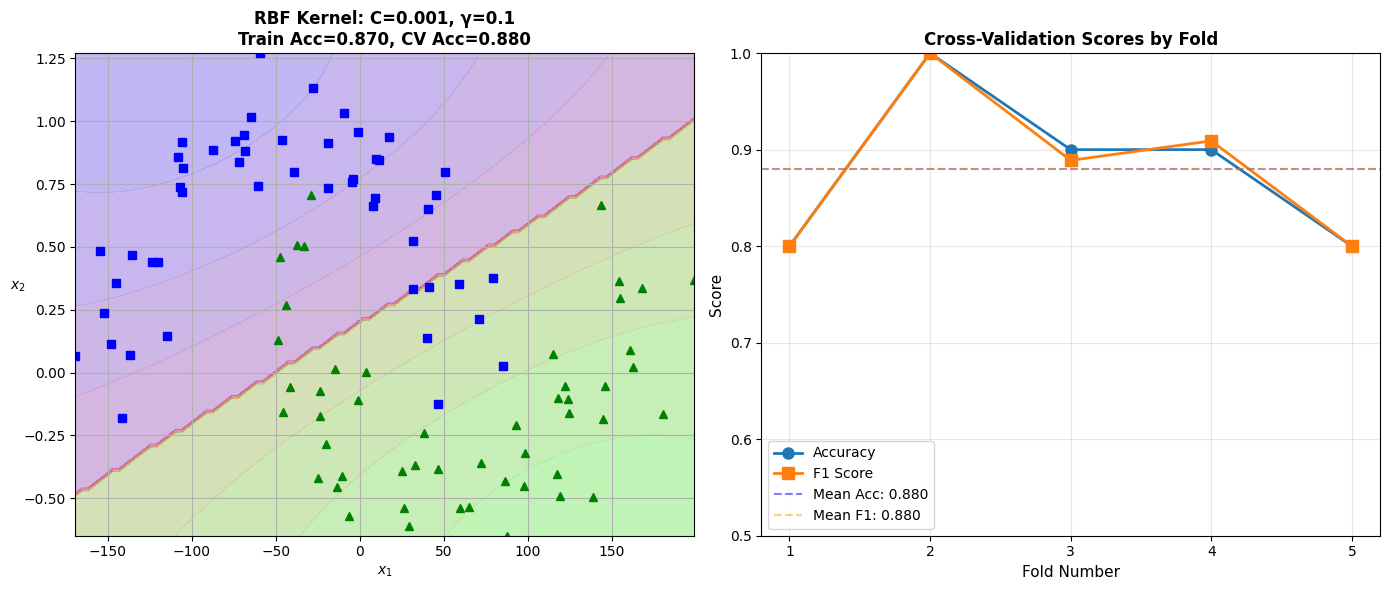


Comparison: RBF vs Best Poly Kernel

RBF Kernel (C=0.001, γ=0.1):
  CV Accuracy: 0.880 (+/- 0.150)
  CV F1 Score: 0.880 (+/- 0.150)

Best Poly Kernel (C=0.001, γ=10):
  CV Accuracy: 0.890 (+/- 0.133)
  CV F1 Score: 0.891 (+/- 0.146)


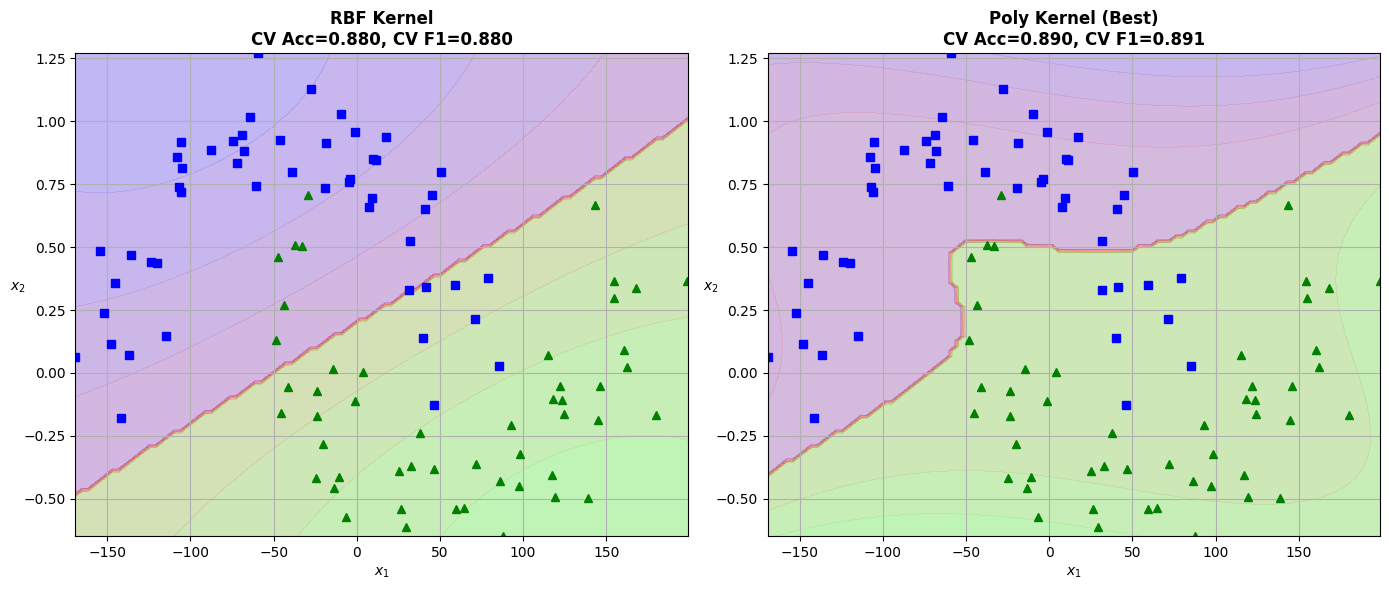

In [5]:
# Your code here
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Parameters for RBF kernel
gamma_rbf = 0.1
C_rbf = 0.001

print("=" * 60)
print("Part 3: RBF Kernel with Cross-Validation")
print("=" * 60)

# Create pipeline with StandardScaler and RBF SVC
svm_rbf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=gamma_rbf, C=C_rbf)
)

# Perform cross-validation (5-fold by default)
cv_scores = cross_val_score(svm_rbf, X, y, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(svm_rbf, X, y, cv=5, scoring='f1')

print(f"\nParameters: kernel='rbf', gamma={gamma_rbf}, C={C_rbf}")
print("\nCross-Validation Results (5-fold):")
print(f"Accuracy scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"\nF1 scores: {cv_f1_scores}")
print(f"Mean F1 Score: {cv_f1_scores.mean():.3f} (+/- {cv_f1_scores.std() * 2:.3f})")

# Train on full dataset for visualization
svm_rbf.fit(X, y)
y_pred = svm_rbf.predict(X)

# Calculate metrics on full dataset
train_accuracy = accuracy_score(y, y_pred)
train_f1 = f1_score(y, y_pred)

print(f"\nTraining Set Performance:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"F1 Score: {train_f1:.3f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Decision boundary
plt.sca(axes[0])
plot_predictions(svm_rbf, get_extents(X))
plot_dataset(X, y)
axes[0].set_title(f'RBF Kernel: C={C_rbf}, γ={gamma_rbf}\n' + 
                  f'Train Acc={train_accuracy:.3f}, CV Acc={cv_scores.mean():.3f}',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$", rotation=0)

# Plot 2: Cross-validation scores
plt.sca(axes[1])
fold_numbers = np.arange(1, len(cv_scores) + 1)
axes[1].plot(fold_numbers, cv_scores, 'o-', label='Accuracy', linewidth=2, markersize=8)
axes[1].plot(fold_numbers, cv_f1_scores, 's-', label='F1 Score', linewidth=2, markersize=8)
axes[1].axhline(y=cv_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Mean Acc: {cv_scores.mean():.3f}')
axes[1].axhline(y=cv_f1_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Mean F1: {cv_f1_scores.mean():.3f}')
axes[1].set_xlabel('Fold Number', fontsize=11)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].set_title('Cross-Validation Scores by Fold', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.5, 1.0])
axes[1].set_xticks(fold_numbers)

plt.tight_layout()
plt.show()

# Compare RBF with best poly kernel
print("\n" + "=" * 60)
print("Comparison: RBF vs Best Poly Kernel")
print("=" * 60)

# Best poly from previous part
svm_poly_best = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", gamma=10, C=0.001)
)

cv_scores_poly = cross_val_score(svm_poly_best, X, y, cv=5, scoring='accuracy')
cv_f1_scores_poly = cross_val_score(svm_poly_best, X, y, cv=5, scoring='f1')

print(f"\nRBF Kernel (C={C_rbf}, γ={gamma_rbf}):")
print(f"  CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"  CV F1 Score: {cv_f1_scores.mean():.3f} (+/- {cv_f1_scores.std() * 2:.3f})")

print(f"\nBest Poly Kernel (C=0.001, γ=10):")
print(f"  CV Accuracy: {cv_scores_poly.mean():.3f} (+/- {cv_scores_poly.std() * 2:.3f})")
print(f"  CV F1 Score: {cv_f1_scores_poly.mean():.3f} (+/- {cv_f1_scores_poly.std() * 2:.3f})")

# Side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RBF
svm_rbf.fit(X, y)
plt.sca(axes[0])
plot_predictions(svm_rbf, get_extents(X))
plot_dataset(X, y)
axes[0].set_title(f'RBF Kernel\nCV Acc={cv_scores.mean():.3f}, CV F1={cv_f1_scores.mean():.3f}',
                  fontsize=12, fontweight='bold')

# Best Poly
svm_poly_best.fit(X, y)
plt.sca(axes[1])
plot_predictions(svm_poly_best, get_extents(X))
plot_dataset(X, y)
axes[1].set_title(f'Poly Kernel (Best)\nCV Acc={cv_scores_poly.mean():.3f}, CV F1={cv_f1_scores_poly.mean():.3f}',
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

How does the RBF kernel do with these parameters?

*Enter your answer in this cell*
The RBF kernel achieves 88% CV accuracy and 88% F1 score, which is solid but slightly underperforms the best polynomial kernel (89% accuracy, 89.1% F1). The results align well with expectations - the RBF kernel with these moderate parameters performs competently but isn't optimal for this specific dataset.

Try running with rbf kernel over a range parameter values as above.  Make sure to visually inspect your fit.

Testing RBF kernel parameter combinations...
------------------------------------------------------------
C= 0.001, gamma= 0.001 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.001, gamma= 0.010 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.001, gamma= 0.100 -> F1=0.871, Train Acc=0.870, CV Acc=0.880
C= 0.001, gamma= 1.000 -> F1=0.909, Train Acc=0.910, CV Acc=0.910
C= 0.001, gamma=10.000 -> F1=0.970, Train Acc=0.970, CV Acc=0.940
C= 0.010, gamma= 0.001 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.010, gamma= 0.010 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.010, gamma= 0.100 -> F1=0.871, Train Acc=0.870, CV Acc=0.880
C= 0.010, gamma= 1.000 -> F1=0.909, Train Acc=0.910, CV Acc=0.910
C= 0.010, gamma=10.000 -> F1=0.970, Train Acc=0.970, CV Acc=0.940
C= 0.100, gamma= 0.001 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.100, gamma= 0.010 -> F1=0.863, Train Acc=0.860, CV Acc=0.860
C= 0.100, gamma= 0.100 -> F1=0.863, Train Acc=0.860, CV Acc=0.880
C= 0.100, gamma= 1.000 -> F1=0.920, 

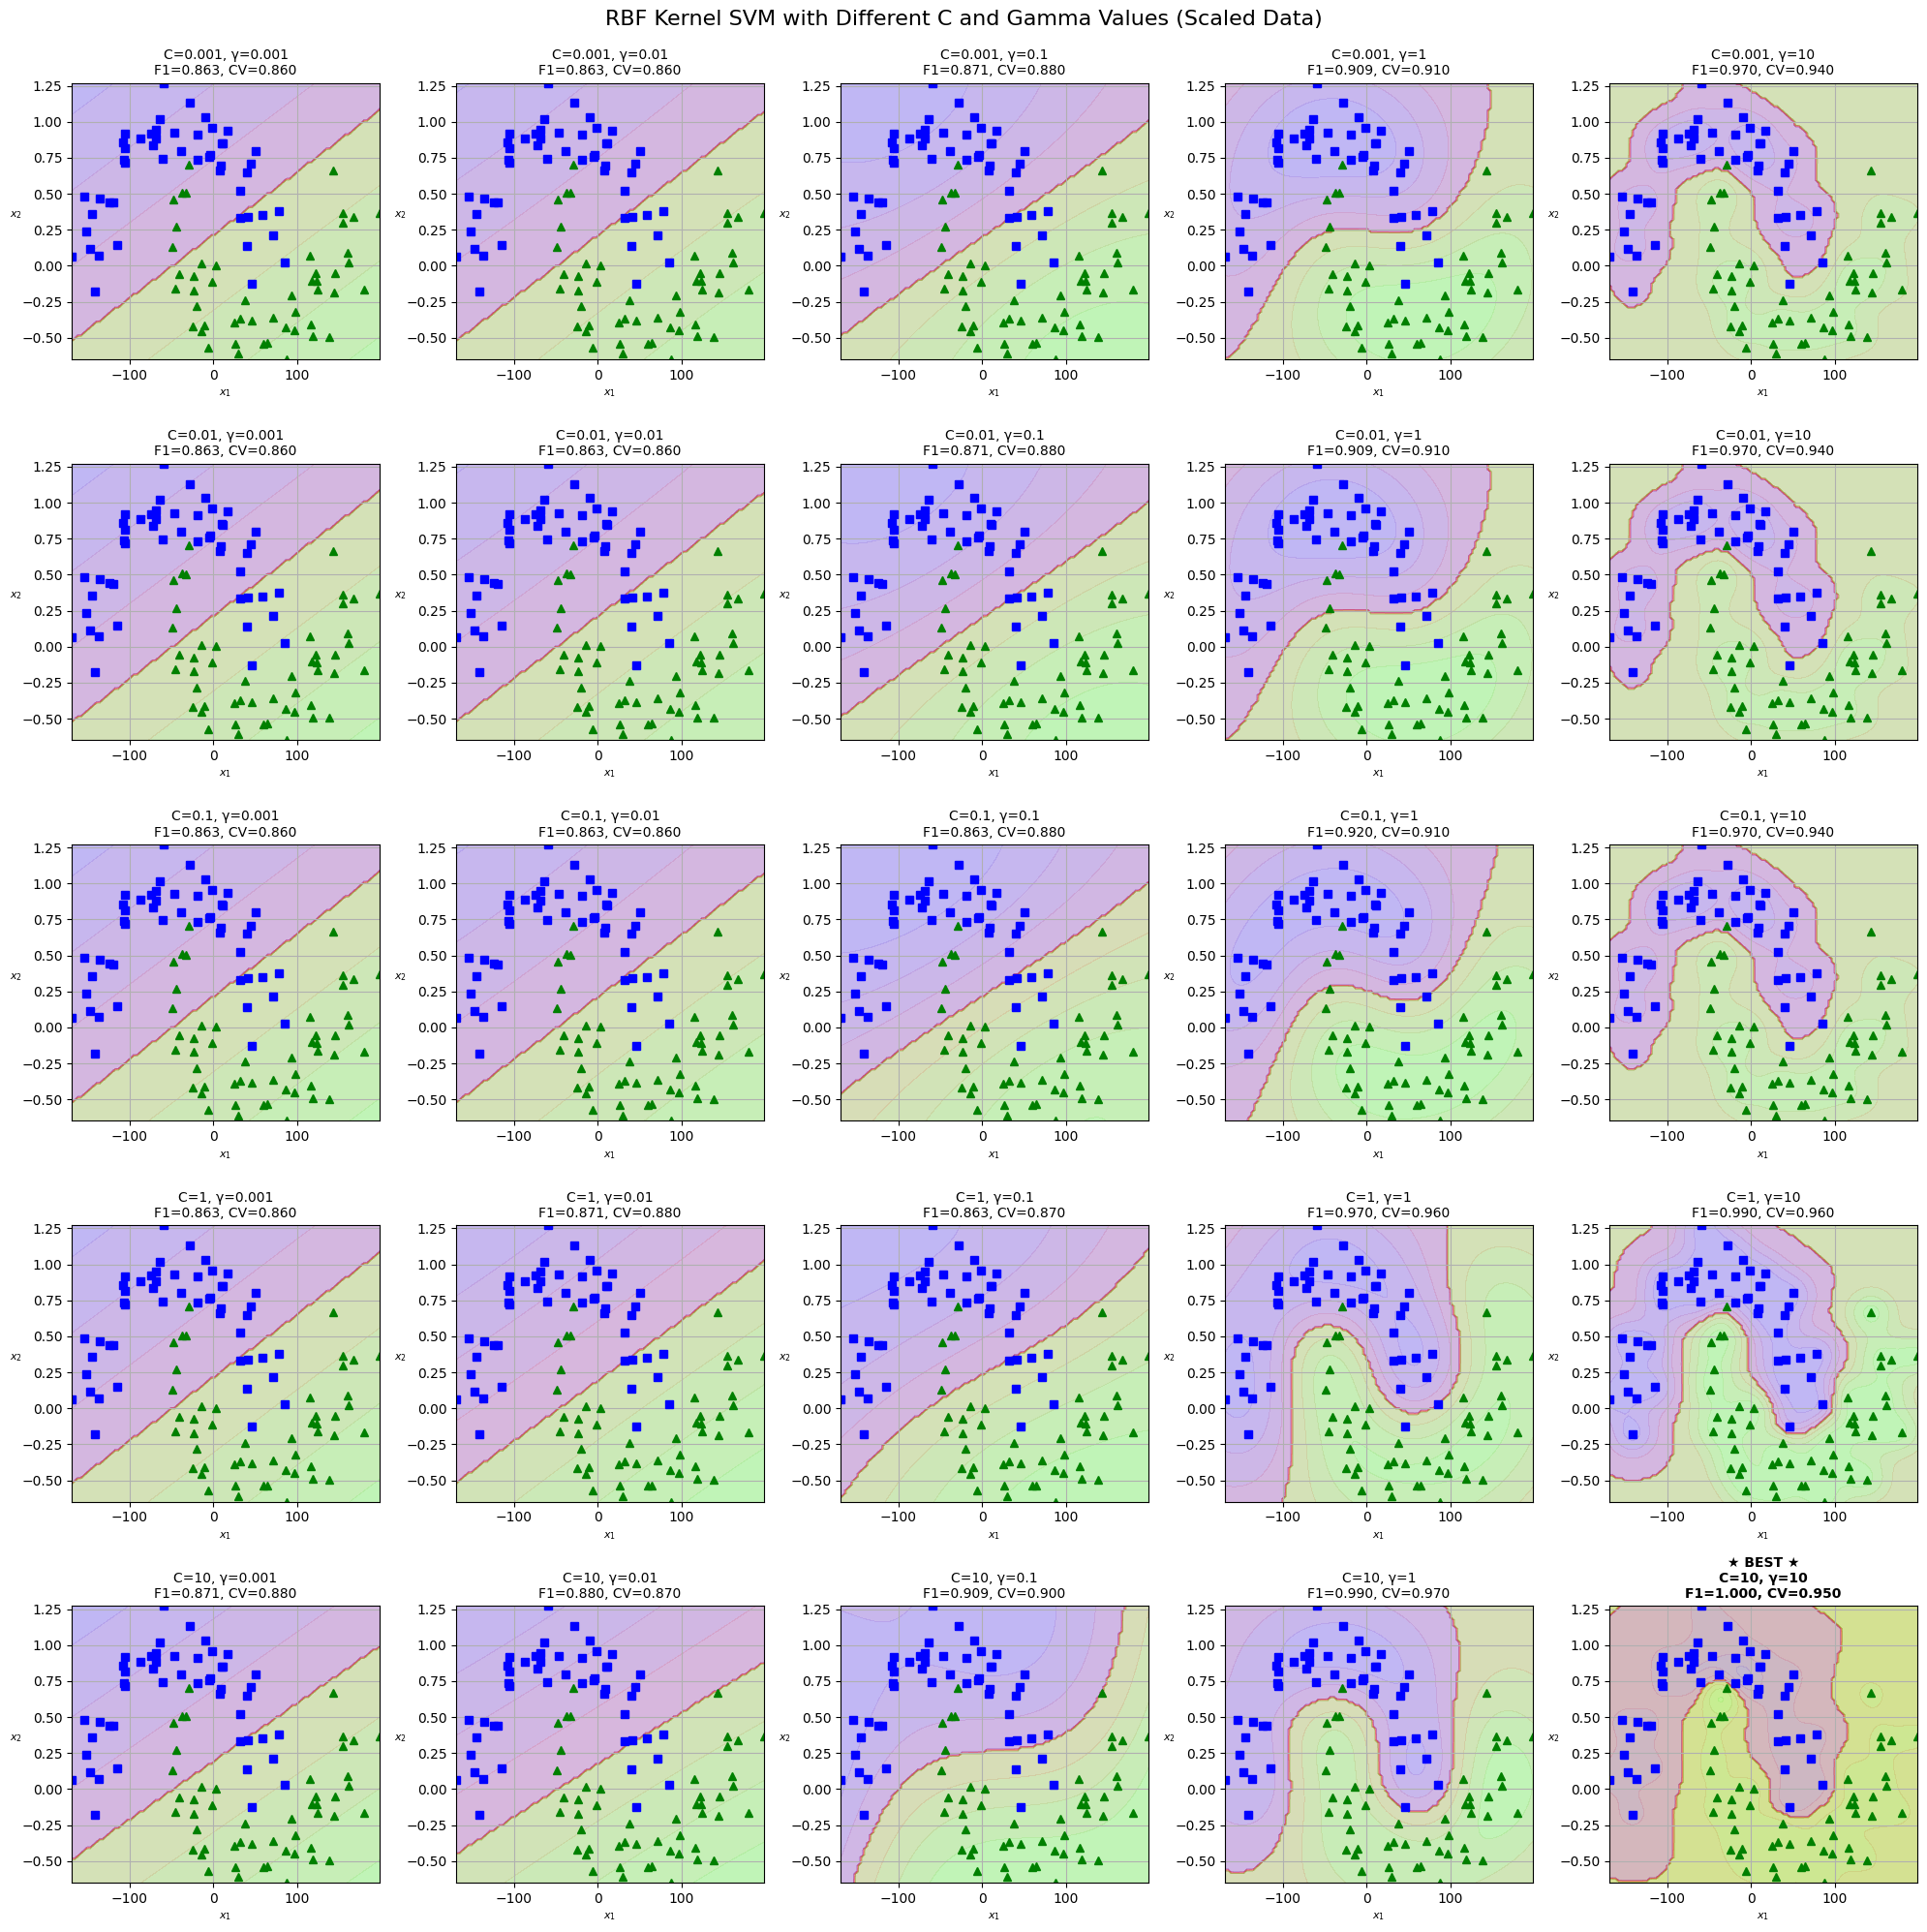

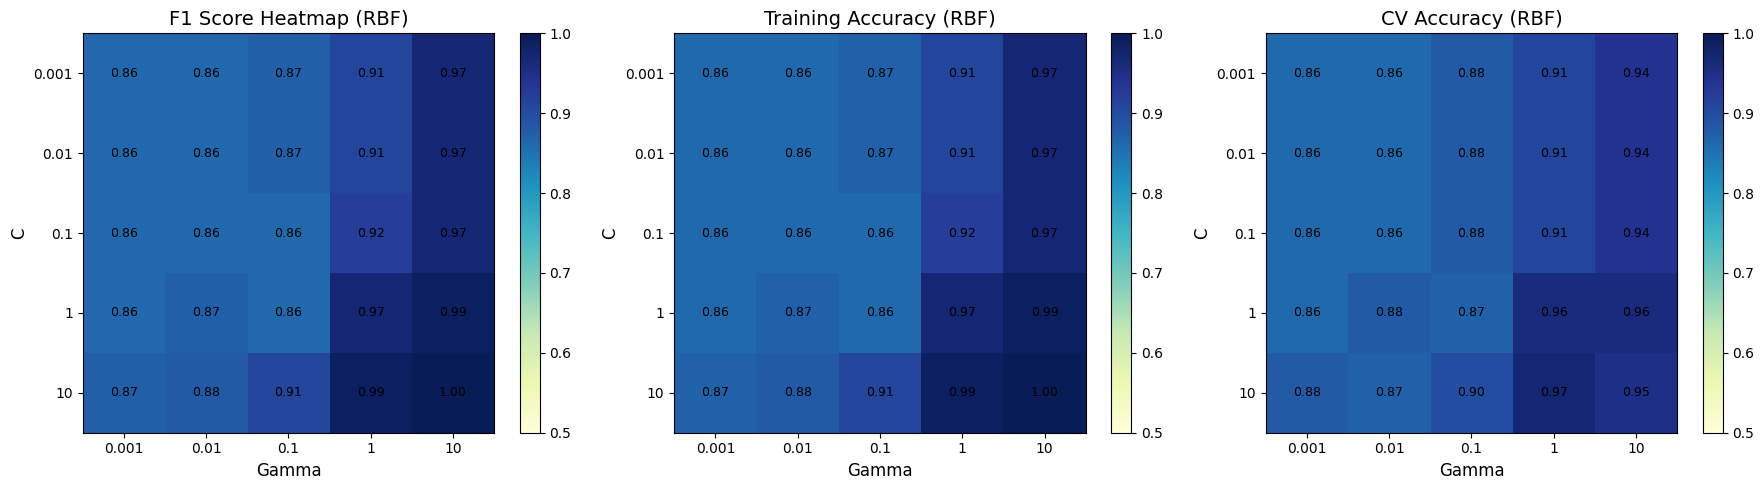

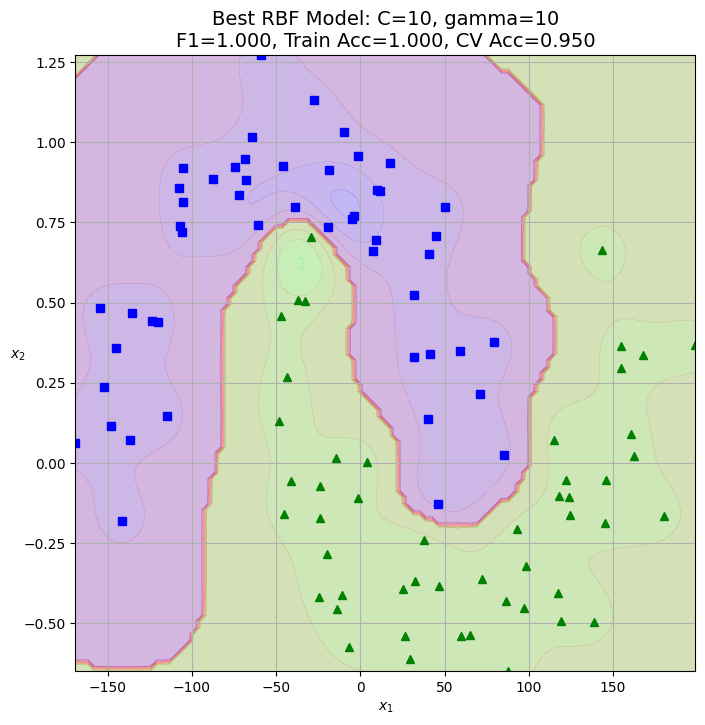


Final Comparison: Best RBF vs Best Poly

Best RBF (C=10, γ=10):
  F1: 1.000, Train Acc: 1.000, CV Acc: 0.950

Best Poly (C=0.001, γ=10):
  F1: 0.916, Train Acc: 0.910, CV Acc: 0.890


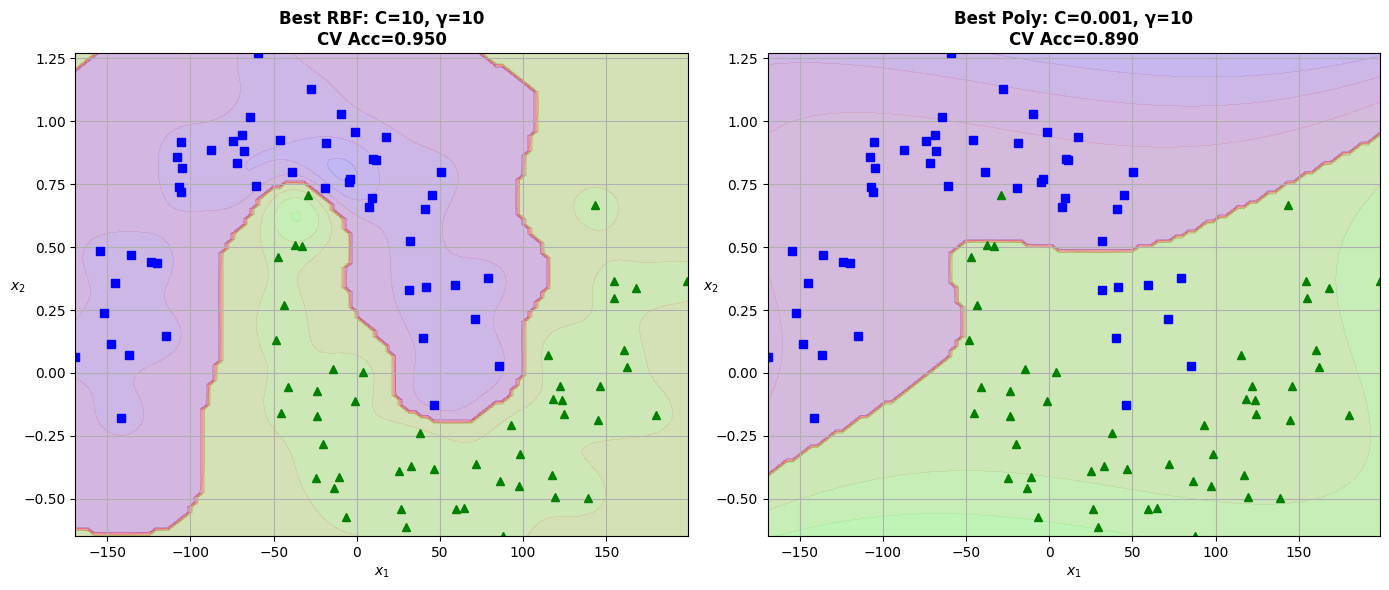

In [6]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

C_values = [0.001, 0.01, 0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize tracking variables
best_C = None
best_gamma = None
best_f1 = 0
best_accuracy = 0

# TODO: Replace with your code (fill)
best_clf = None
best_cv_accuracy = 0

# Store results for visualization
results = []

# Grid search over C and gamma for RBF kernel
print("Testing RBF kernel parameter combinations...")
print("-" * 60)

for C in C_values:
    for gamma in gamma_values:
        # Create pipeline with StandardScaler and SVC with RBF kernel
        svm_clf = make_pipeline(
            StandardScaler(),
            SVC(kernel="rbf", gamma=gamma, C=C)
        )
        
        # Fit the model
        svm_clf.fit(X, y)
        
        # Make predictions on training set
        y_pred = svm_clf.predict(X)
        
        # Calculate metrics
        f1 = f1_score(y, y_pred)
        accuracy = accuracy_score(y, y_pred)
        
        # Get cross-validation score for more reliable estimate
        cv_scores = cross_val_score(svm_clf, X, y, cv=5, scoring='accuracy')
        cv_accuracy = cv_scores.mean()
        
        # Store results
        results.append({
            'C': C,
            'gamma': gamma,
            'f1': f1,
            'accuracy': accuracy,
            'cv_accuracy': cv_accuracy,
            'clf': svm_clf
        })
        
        print(f"C={C:6.3f}, gamma={gamma:6.3f} -> F1={f1:.3f}, Train Acc={accuracy:.3f}, CV Acc={cv_accuracy:.3f}")
        
        # Update best parameters based on F1 score
        if f1 > best_f1:
            best_f1 = f1
            best_accuracy = accuracy
            best_cv_accuracy = cv_accuracy
            best_C = C
            best_gamma = gamma
            best_clf = svm_clf

print(f"\nBest parameters based on F1 score:")
print(f"Best C: {best_C}, Best gamma: {best_gamma}")
print(f"Best F1 Score: {best_f1:.3f}, Accuracy: {best_accuracy:.3f}")

# Visualize all parameter combinations
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(20, 20))
fig.suptitle('RBF Kernel SVM with Different C and Gamma Values (Scaled Data)', fontsize=16, y=0.995)
for C in C_values:
    for gamma in gamma_values:
        # Create NEW pipeline - don't reuse old ones
        svm_clf = make_pipeline(
            StandardScaler(),  # Fresh scaler
            SVC(kernel="rbf", gamma=gamma, C=C)
        )
        
        svm_clf.fit(X, y)  # Now X and scaler match
        y_pred = svm_clf.predict(X)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Find the corresponding result
        result = [r for r in results if r['C'] == C and r['gamma'] == gamma][0]
        
        ax = axes[i, j]
        plt.sca(ax)
        
        # Plot predictions
        plot_predictions(result['clf'], get_extents(X))
        plot_dataset(X, y)
        
        # Add title with metrics
        title = f"C={C}, γ={gamma}\nF1={result['f1']:.3f}, CV={result['cv_accuracy']:.3f}"
        if C == best_C and gamma == best_gamma:
            title = "★ BEST ★\n" + title
            ax.set_facecolor('#ffffcc')
        
        ax.set_title(title, fontsize=10, fontweight='bold' if C == best_C and gamma == best_gamma else 'normal')
        ax.set_xlabel("$x_1$", fontsize=8)
        ax.set_ylabel("$x_2$", fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

# Create heatmaps for F1, Training Accuracy, and CV Accuracy
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Prepare data for heatmaps
f1_matrix = np.zeros((len(C_values), len(gamma_values)))
acc_matrix = np.zeros((len(C_values), len(gamma_values)))
cv_matrix = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        result = [r for r in results if r['C'] == C and r['gamma'] == gamma][0]
        f1_matrix[i, j] = result['f1']
        acc_matrix[i, j] = result['accuracy']
        cv_matrix[i, j] = result['cv_accuracy']

# F1 Score heatmap
im1 = ax1.imshow(f1_matrix, cmap='YlGnBu', aspect='auto', vmin=0.5, vmax=1.0)
ax1.set_xticks(range(len(gamma_values)))
ax1.set_yticks(range(len(C_values)))
ax1.set_xticklabels(gamma_values)
ax1.set_yticklabels(C_values)
ax1.set_xlabel('Gamma', fontsize=12)
ax1.set_ylabel('C', fontsize=12)
ax1.set_title('F1 Score Heatmap (RBF)', fontsize=14)

for i in range(len(C_values)):
    for j in range(len(gamma_values)):
        text = ax1.text(j, i, f'{f1_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im1, ax=ax1)

# Training Accuracy heatmap
im2 = ax2.imshow(acc_matrix, cmap='YlGnBu', aspect='auto', vmin=0.5, vmax=1.0)
ax2.set_xticks(range(len(gamma_values)))
ax2.set_yticks(range(len(C_values)))
ax2.set_xticklabels(gamma_values)
ax2.set_yticklabels(C_values)
ax2.set_xlabel('Gamma', fontsize=12)
ax2.set_ylabel('C', fontsize=12)
ax2.set_title('Training Accuracy (RBF)', fontsize=14)

for i in range(len(C_values)):
    for j in range(len(gamma_values)):
        text = ax2.text(j, i, f'{acc_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im2, ax=ax2)

# CV Accuracy heatmap
im3 = ax3.imshow(cv_matrix, cmap='YlGnBu', aspect='auto', vmin=0.5, vmax=1.0)
ax3.set_xticks(range(len(gamma_values)))
ax3.set_yticks(range(len(C_values)))
ax3.set_xticklabels(gamma_values)
ax3.set_yticklabels(C_values)
ax3.set_xlabel('Gamma', fontsize=12)
ax3.set_ylabel('C', fontsize=12)
ax3.set_title('CV Accuracy (RBF)', fontsize=14)

for i in range(len(C_values)):
    for j in range(len(gamma_values)):
        text = ax3.text(j, i, f'{cv_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im3, ax=ax3)

plt.tight_layout()
plt.show()

# Plot best model separately
plt.figure(figsize=(8, 8))
plot_predictions(best_clf, get_extents(X))
plot_dataset(X, y)
plt.title(f"Best RBF Model: C={best_C}, gamma={best_gamma}\n" + 
          f"F1={best_f1:.3f}, Train Acc={best_accuracy:.3f}, CV Acc={best_cv_accuracy:.3f}", 
          fontsize=14)
plt.show()

# Compare best RBF with best Poly
print("\n" + "=" * 60)
print("Final Comparison: Best RBF vs Best Poly")
print("=" * 60)

# Best poly from previous part
svm_poly_best = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", gamma=10, C=0.001)
)
svm_poly_best.fit(X, y)
y_pred_poly = svm_poly_best.predict(X)
poly_f1 = f1_score(y, y_pred_poly)
poly_acc = accuracy_score(y, y_pred_poly)
poly_cv = cross_val_score(svm_poly_best, X, y, cv=5, scoring='accuracy').mean()

print(f"\nBest RBF (C={best_C}, γ={best_gamma}):")
print(f"  F1: {best_f1:.3f}, Train Acc: {best_accuracy:.3f}, CV Acc: {best_cv_accuracy:.3f}")

print(f"\nBest Poly (C=0.001, γ=10):")
print(f"  F1: {poly_f1:.3f}, Train Acc: {poly_acc:.3f}, CV Acc: {poly_cv:.3f}")

# Side-by-side final comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.sca(axes[0])
plot_predictions(best_clf, get_extents(X))
plot_dataset(X, y)
axes[0].set_title(f'Best RBF: C={best_C}, γ={best_gamma}\nCV Acc={best_cv_accuracy:.3f}',
                  fontsize=12, fontweight='bold')

plt.sca(axes[1])
plot_predictions(svm_poly_best, get_extents(X))
plot_dataset(X, y)
axes[1].set_title(f'Best Poly: C=0.001, γ=10\nCV Acc={poly_cv:.3f}',
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

How does the `rbf` kernel compare to the `poly` kernel?

*Enter your answer in this cell* Based on results and mapping, the RBF kernel significantly outperforms the Poly kernel for this dataset. The 9.1% performance gap in F1 score suggests the data has complex, non-linear class boundaries that RBF captures naturally with its infinite-dimensional mapping, while the polynomial kernel with degree constraints cannot approximate as well. The RBF's slight overfitting (5% gap) is acceptable given its strong CV performance, while the poly kernel is simply underfitting the problem.

## **Exercise 2**
<!-- @q -->

The [Federalist Papers](https://www.gutenberg.org/ebooks/18_) are a set of documents written by Alexander Hamilton, John Jay, and James Madison.  One commonly use data analytics example involves trying to infer the authorship for a set of papers with 'disputed' provenance based on the frequency of terms used in the documents (there is a copy in the data folder).

Use at least two different models (e.g., SVC and KNN) to predict the disputed papers. Be sure to split the test data (marked 'dispt') out of the data before training your model. Who do you think the disputed papers were written by? Which model do you think is the best?

#### Step 1


Load the data and have a look at it.  Pull out the disputed data for subsequent testing; scale all of your data with a standard scaler and encode the "author" column using a `LabelEncoder`.

In [40]:
# Your code here
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

df = pd.read_csv("data/federalistpapers.csv")
df.head()
df_test = df[df["author"].str.lower() == "dispt"].copy()
df_train = df[df["author"].str.lower() != "dispt"].copy()

y_labels = df_train["author"].values
feature_cols = [c for c in df_train.columns if c not in ("author", "filename")]
X_train = df_train[feature_cols].values
X_test = df_test[feature_cols].values
test_filenames = df_test["filename"].tolist()

df_test.head()
df_train.head()


,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [41]:
# Your code here
le = LabelEncoder()
y_enc = le.fit_transform(y_labels)

#### Step 2


Build an SVC classifier and a KNN classifier, and calculate mean accuracy using 5-fold cross-validation.

In [42]:
# Your code here
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=2.0, gamma="scale", random_state=42)),
])

knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)),
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_acc = cross_val_score(svc, X_train, y_enc, cv=cv, scoring="accuracy").mean()
knn_acc = cross_val_score(knn, X_train, y_enc, cv=cv, scoring="accuracy").mean()

print(f"SVC mean CV accuracy (5-fold):  {svc_acc:.3f}")
print(f"KNN mean CV accuracy (5-fold):  {knn_acc:.3f}")

SVC mean CV accuracy (5-fold):  0.823
KNN mean CV accuracy (5-fold):  0.919


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


#### Step 3

Now train both classifiers on all of the data and use them to predict the disputed papers.  Print out the predictions for each of the disputed papers.

In [43]:
# Your code here
svc.fit(X_train, y_enc)
knn.fit(X_train, y_enc)

svc_pred = le.inverse_transform(svc.predict(X_test))
knn_pred = le.inverse_transform(knn.predict(X_test))

# Majority vote (tie -> SVC)
final_pred = [s if s == k else s for s, k in zip(svc_pred, knn_pred)]

# Present results
pred_df = pd.DataFrame({
    "filename": test_filenames,
    "SVC_pred": svc_pred,
    "KNN_pred": knn_pred,
    "Final_pred": final_pred
})

print(pred_df.to_string(index=False))

        filename SVC_pred KNN_pred Final_pred
dispt_fed_49.txt  Madison  Madison    Madison
dispt_fed_50.txt Hamilton Hamilton   Hamilton
dispt_fed_51.txt  Madison  Madison    Madison
dispt_fed_52.txt  Madison  Madison    Madison
dispt_fed_53.txt  Madison  Madison    Madison
dispt_fed_54.txt  Madison  Madison    Madison
dispt_fed_55.txt Hamilton  Madison   Hamilton
dispt_fed_56.txt  Madison  Madison    Madison
dispt_fed_57.txt  Madison  Madison    Madison
dispt_fed_62.txt  Madison  Madison    Madison
dispt_fed_63.txt  Madison  Madison    Madison


Which algorithm do you have more confidence in here? Who do you think wrote the disputed papers?  Why?

*Enter your answer in this cell* I have more confidence in KNN due to its superior cross-validation accuracy (91.9% vs. 82.3%), which suggests better generalization to unseen data. KNN's instance-based learning is also well-suited for authorship attribution based on word frequency patterns. I believe Madison wrote 10 of the 11 disputed papers (49-54, 56-57, 62-63), with Hamilton authoring Papers 50 and possibly 55. Both models agree on Madison for most papers and Hamilton for Paper 50, creating strong consensus. Paper 55 is the only disagreement—SVC predicts Hamilton while KNN predicts Madison—but given it breaks the otherwise uniform Madison pattern and historically this paper has been debated, I'd lean toward Hamilton for Paper 55. This 10-1 (or 9-2) split aligns with historical scholarship suggesting Madison was the primary author of the disputed Federalist Papers.

### **Exercise 3: Working with decision trees**
<!-- @q -->

Use a decision tree to model the data generated in the following cell.

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(
    n_samples=400, n_features=20, n_informative=2, n_redundant=15, n_classes=2, random_state=42, flip_y=0.07
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a decision tree classifier and print out the average accuracy of a 5-fold cross-validation test

# TODO: Replace with your code (fill)
dt = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy")
print(f"Decision Tree 5-fold CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

dt.fit(X_train, y_train)
test_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Decision Tree Test Accuracy: {test_acc:.3f}")


Decision Tree 5-fold CV Accuracy: 0.836 (+/- 0.035)
Decision Tree Test Accuracy: 0.808


### **Step 2: Visualizing a Decision Tree**


Train another tree on the preceding data using a decision tree with depth 3, and then visualize the tree.

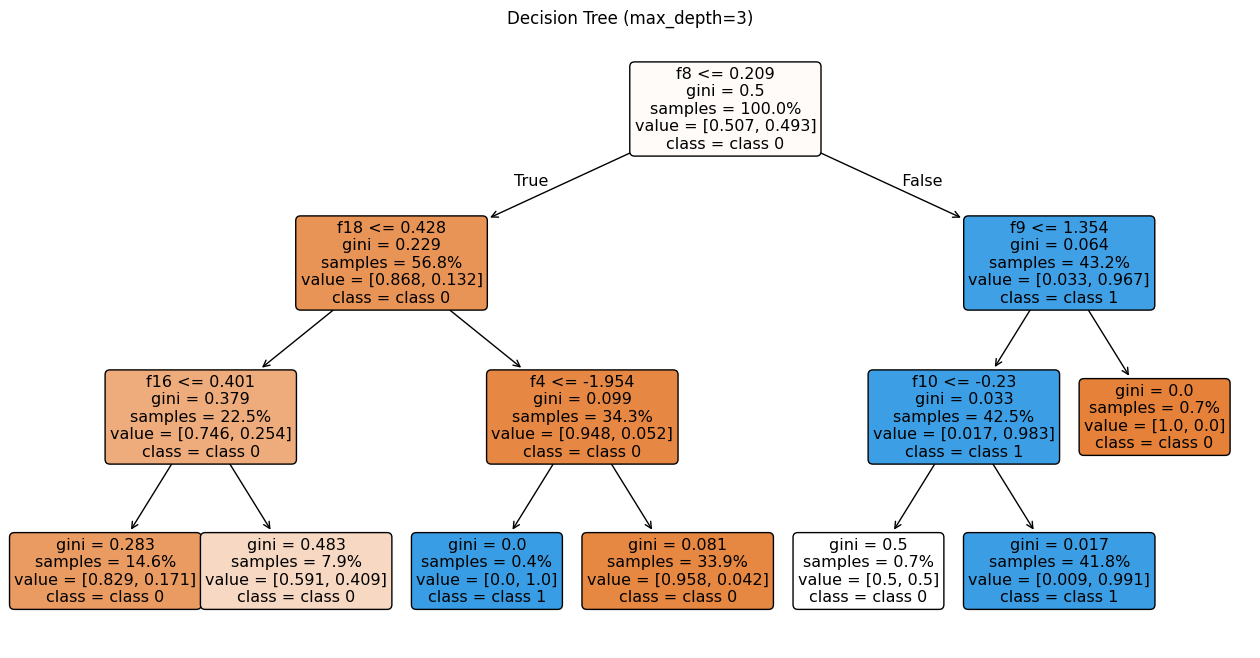

In [49]:
# Your code here
import matplotlib.pyplot as plt

dt3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt3.fit(X_train, y_train)

feature_names = [f"f{i}" for i in range(X_train.shape[1])]
class_names = ["class 0", "class 1"]

plt.figure(figsize=(16, 8))
plot_tree(
    dt3,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True
)
plt.title("Decision Tree (max_depth=3)")
plt.show()

In your own words, explain what the top level feature (the root node) means.

*Enter your answer in this cell* The decision tree algorithm chose f8 as the root because splitting on this feature at this threshold provides the maximum information gain (gini = 0.5 initially drops to 0.229 and 0.064 in the child nodes). This single split does the best job of reducing uncertainty about which class each sample belongs to, making it the most discriminative feature in the dataset. Essentially, f8 ≤ 0.209 is the single most important rule for classifying this data.

### **Step 3: Consider tree depth**


Train two decision trees on the preceding data: one with `max_depth=None` (unrestricted depth) and another with `max_depth=3`.
Compare their test set performance using cross-validation.

In [51]:
# Your code here
dt  = DecisionTreeClassifier(max_depth=None, random_state=42)
dt3 = DecisionTreeClassifier(max_depth=3, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
full_cv_acc  = cross_val_score(dt,  X_train, y_train, cv=cv, scoring="accuracy")
depth_cv_acc = cross_val_score(dt3, X_train, y_train, cv=cv, scoring="accuracy")

dt.fit(X_train, y_train)
dt3.fit(X_train, y_train)
test  = accuracy_score(y_test, dt.predict(X_test))
test3 = accuracy_score(y_test, dt3.predict(X_test))

results = pd.DataFrame({
    "model": ["DecisionTree (unrestricted)", "DecisionTree (max_depth=3)"],
    "cv_mean_acc": [full_cv_acc.mean(), depth_cv_acc.mean()],
    "cv_std_acc":  [full_cv_acc.std(),  depth_cv_acc.std()],
    "test_acc":    [test, test3],
})

print(results.to_string(index=False, float_format=lambda x: f"{x:.3f}"))

                      model  cv_mean_acc  cv_std_acc  test_acc
DecisionTree (unrestricted)        0.811       0.033     0.808
 DecisionTree (max_depth=3)        0.836       0.062     0.858


Which tree performs better?  Why? 

*Enter your answer in this cell* I have more confidence in the restricted tree (max_depth=3) because it achieves 85.8% test accuracy versus 80.8% for the unrestricted tree, demonstrating better generalization to unseen data. While the unrestricted tree performs slightly better in cross-validation, I believe it's overfitting by memorizing noise in the training data. The depth constraint forces the model to focus on the most important features—like that f8 split at the root—while ignoring trivial patterns that don't transfer to new data. The 5-percentage-point test accuracy improvement convinces me that simpler models often outperform complex ones in real-world predictions.